# Докукин Дмитрий Владимирович

## 18-ИВТ-2

## Вариант 7

### Набор данных: 1; классификаторы: 2, 3

### Цель работы: получение навыков работы с методами регрессии

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных 

id - уникальный идентификатор для каждого проданного дома  
date - дата продажи дома  
price - цена каждого проданного дома  
bedrooms - Количество спален  
bathrooms - Количество ванных комнат, где 5 приходится на комнату с туалетом но без душа  
sqft_living - квадратные метры внутренней жилой площади квартир  
sqft_lot - квадратные метры земельного участка  
floors - количество этажей  
waterfront - фиктивная переменная для того, выходила ли квартира на набережную или нет  
view - индекс от 0 до 4 того, насколько хорошим был вид объекта недвижимости  
condition - индекс от 1 до 5 по состоянию квартиры  
grade - это показатель от 1 до 13, где 1-3 не дотягивают до уровня строительства и проектирования зданий, 7 имеют средний уровень строительства и проектирования, а 11-13 имеют высокий уровень качества строительства и проектирования.  
sqft_above - квадратный метр внутреннего жилого пространства, находящегося над уровнем земли  
sqft_basement - квадратный метраж внутреннего жилого пространства, находящегося ниже уровня земли  
yr_built - год, когда дом был первоначально построен  
yr_renovated - год последнего ремонта дома  
zipcode - почтовый индекс дома  
lat - широта  
long - долгота  
sqft_living15 - метраж внутренней жилой площади жилого помещения для ближайших 15 соседей  
sqft_lot15 - квадратные метры земельных участков ближайших 15 соседей  

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
print("Размер набора данных до удаления дубликатов:\t", df.index.size)
df.drop_duplicates(inplace = True)
print("Размер набора данных после удаления дубликатов:\t", df.index.size)

Размер набора данных до удаления дубликатов:	 21613
Размер набора данных после удаления дубликатов:	 21613


### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования

In [6]:
df1 = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
df1

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,0,1340,5650
1,538000.0,2570,7242,2170,400,1690,7639
2,180000.0,770,10000,770,0,2720,8062
3,604000.0,1960,5000,1050,910,1360,5000
4,510000.0,1680,8080,1680,0,1800,7503
...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,1530,0,1530,1509
21609,400000.0,2310,5813,2310,0,1830,7200
21610,402101.0,1020,1350,1020,0,1020,2007
21611,400000.0,1600,2388,1600,0,1410,1287


BoxPlot для признаков до масштабирования:

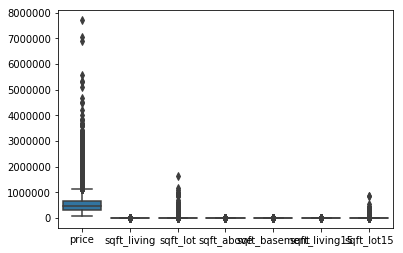

In [7]:
sn.boxplot(data = df1)

BoxPlot для признаков после масштабирования:

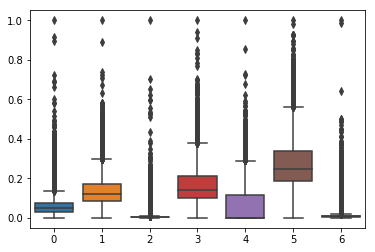

In [8]:
scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

sn.boxplot(data = df1)

### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [9]:
dummie_df = pd.get_dummies(df.condition, prefix = "condition")
df = df.drop('condition', axis = 1)
df = df.merge(dummie_df, left_index=True, right_index=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,condition_1,condition_2,condition_3,condition_4,condition_5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,0,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,0,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,0,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,0,0,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,0,0,1,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,0,0,1,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,0,0,1,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,0,0,1,0,0


### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

In [10]:
corr_df = df
corr_df = corr_df.corr()
corr_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,condition_1,condition_2,condition_3,condition_4,condition_5
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,0.008130,...,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.003154,-0.012075,0.030820,-0.025426,-0.009513
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.667434,...,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.020885,-0.051917,0.007131,-0.030715,0.057585
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.356967,...,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.036246,-0.051950,0.004871,-0.008931,0.028119
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,0.664983,...,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.045493,-0.077411,0.190546,-0.166147,-0.034292
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,0.762704,...,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.035069,-0.065324,0.102413,-0.083794,-0.018136
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,0.113621,...,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.006323,0.037617,-0.011452,0.013157,-0.014497
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,0.458183,...,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.023773,-0.055953,0.318049,-0.257795,-0.120545
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.082775,...,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.011115,-0.001789,-0.016606,0.008713,0.014243
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.251321,...,0.084827,0.006157,-0.078400,0.280439,0.072575,0.003196,-0.018552,-0.037136,0.022689,0.034408
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,1.000000,...,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.058897,-0.087709,0.196592,-0.139373,-0.083520


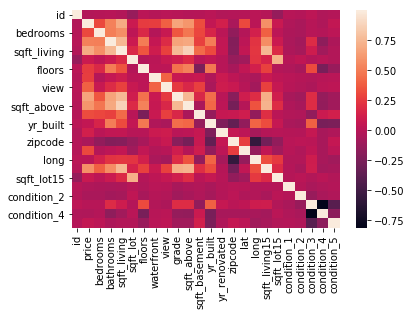

In [11]:
sn.heatmap(corr_df)

### 6. Заполните пропущенные значения в данных

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
condition_1      0
condition_2      0
condition_3      0
condition_4      0
condition_5      0
dtype: int64

Пропусков значений нет

### 7. Решите поставленную задачу регрессии в соответствии с заданием. Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value

Линейная регрессия, LASSO регуляризатор

In [13]:
df.drop(columns = 'date', inplace = True)

x_data, y_data = df.drop(['price'], axis=1), df['price']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 123)

In [14]:
warnings.filterwarnings('ignore')

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
lasso_reg = lasso.predict(X = x_test)

pearson, p_value_pearson = pearsonr(lasso_reg , y_test)
spearman, p_value_spearman = spearmanr(lasso_reg , y_test)

print('Коэффициент Пирсона:', pearson)
print('Коэффициент Спирмена', spearman)

if p_value_pearson < 0.05 and p_value_spearman < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')

Коэффициент Пирсона: 0.8425834667641643
Коэффициент Спирмена 0.8567429226487829
p-value is good


Линейная регрессия, RIDGE регуляризатор

In [15]:
reg = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(x_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

reg = Ridge(alpha=best_alpha)
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)

pearson, p_value_pearson = pearsonr(pred_reg, y_test)
spearman, p_value_spearman = spearmanr(pred_reg, y_test)

print('Коэффициент Пирсона:', pearson)
print('Коэффициент Спирмена', spearman)

if p_value_pearson < 0.05 and p_value_spearman < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')

best alpha: 1.75
Коэффициент Пирсона: 0.8426693263894669
Коэффициент Спирмена 0.8565176908588309
p-value is good
